In [32]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from plotnine import *
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("cleaned_herostats.csv")
print(df)

                Name Alignment  Intelligence  Strength  Speed  Durability  \
0            3-D Man      good            50        31     43          32   
1             A-Bomb      good            38       100     17          80   
2         Abe Sapien      good            88        14     35          42   
3           Abin Sur      good            50        90     53          64   
4        Abomination       bad            63        80     53          90   
..               ...       ...           ...       ...    ...         ...   
596     Yellowjacket      good            88        10     12          28   
597  Yellowjacket II      good            50        10     35          28   
598             Ymir      good            50       100     27         100   
599          Zatanna      good            75        10     23          28   
600             Zoom       bad            50        10    100          28   

     Power  Combat  Total  
0       25      52    233  
1       17      64 

In [22]:
df_dropped = df.drop(columns = ["Name", "Alignment", "Total"], axis = 1)

In [91]:
normed = mms.fit_transform(df.drop(columns = ["Name", "Alignment", "Total"], axis = 1))

In [36]:
distances = pairwise_distances(normed)

In [109]:
adj = distances < 0.5

In [110]:
sc = SpectralClustering(3,affinity="precomputed")
df['cluster'] = sc.fit_predict(adj);

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.


In [111]:
from sklearn.manifold import TSNE

In [112]:
projection = TSNE(n_components = 2).fit_transform(normed);

In [113]:
tplot = pd.DataFrame(projection, columns=["X1", "X2"])

In [114]:
df["X1"] = tplot["X1"];
df["X2"] = tplot["X2"];

In [115]:
print(df)

                Name Alignment  Intelligence  Strength  Speed  Durability  \
0            3-D Man      good            50        31     43          32   
1             A-Bomb      good            38       100     17          80   
2         Abe Sapien      good            88        14     35          42   
3           Abin Sur      good            50        90     53          64   
4        Abomination       bad            63        80     53          90   
..               ...       ...           ...       ...    ...         ...   
596     Yellowjacket      good            88        10     12          28   
597  Yellowjacket II      good            50        10     35          28   
598             Ymir      good            50       100     27         100   
599          Zatanna      good            75        10     23          28   
600             Zoom       bad            50        10    100          28   

     Power  Combat  Total         X1        X2  cluster  
0       25      5

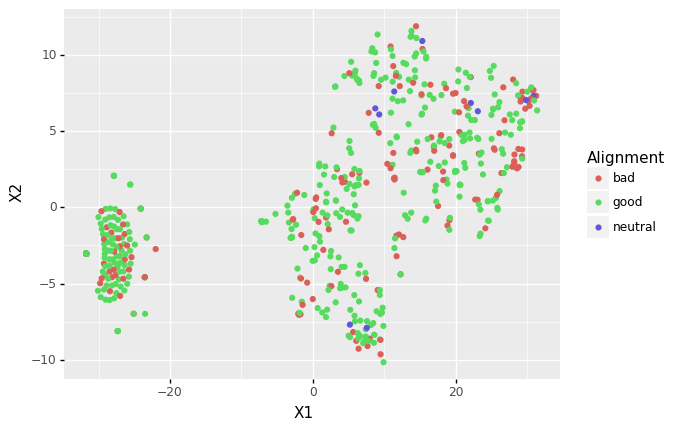

<ggplot: (8764917033024)>

In [128]:
tsneplot = (ggplot(df,aes("X1","X2")) + geom_point(aes(color="Alignment")))
tsneplot

In [118]:
df.to_csv("herostats_tsne.csv", index=False)

In [129]:
tsneplot.save("tsneplot_python.png", width=10, height=10, dpi=300)

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 10 x 10 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: tsneplot_python.png
